In [4]:
import numpy as np 
from matplotlib import pyplot as plt 
import math
import os


mypgmread() and mypgmwrite()

In [11]:
class PGMImage:
    def __init__(self, file_path=None):
        self.magic_number = None
        self.width = 0
        self.height = 0
        self.maxval = 0
        self.pixels = []

        if file_path:
            self.mypgmread(file_path)

    def mypgmread(self, file_path):
        with open(file_path, 'rb') as file:
            self.magic_number = file.readline().strip().decode('ascii')

            line = file.readline().strip()
            while line.startswith(b'#'): 
                line = file.readline().strip()

            self.width, self.height = map(int, line.split())
            self.maxval = int(file.readline().strip())
            data = file.read()
            self.pixels = list(data)

    def modify_pixels(self, row_start, row_end, new_value):
        pixels_2d = np.array(self.pixels, dtype=np.uint8).reshape((self.height, self.width))
        pixels_2d[row_start:row_end, :] = new_value
        self.pixels = pixels_2d.flatten().tolist()

    def mypgmwrite(self, filename):
        pixel_array = np.array(self.pixels, dtype=np.uint8).reshape((self.height, self.width))

        with open(filename, 'wb') as file:
            file.write(f"{self.magic_number}\n".encode())
            file.write(f"{self.width} {self.height}\n".encode())
            file.write(f"{self.maxval}\n".encode())
            pixel_array.tofile(file)
    """
    def myImageLinearScale(self, pixel_array):
        pixel_min = np.min(pixel_array)
        if pixel_min < 0:
            abs_pixel_min = np.abs(pixel_min)
            pixel_array += abs_pixel_min

        pixel_max = np.max(pixel_array)
        pixel_array = (pixel_array * self.maxval) / pixel_max
        pixel_array.astype(np.uint8)

        return pixel_array
    """
    def myImageNegative(self):
        self.pixels = [self.maxval - pixel for pixel in self.pixels]

    def myImageLogTransform(self):
        self.pixels = [np.log(1 + pixel) for pixel in self.pixels]
       # self.pixels = self.myImageLinearScale(self.pixels)
        max_pixel_value = np.max(self.pixels)
        self.pixels = [int(255 * (pixel / max_pixel_value)) for pixel in self.pixels]

        
    def myImageGammaTransform(self, gamma):
        self.pixels = [int(self.maxval * (pixel / self.maxval) ** gamma) for pixel in self.pixels]


    def myImageCorrelation(self, kernel):
        k_height, k_width = kernel.shape
        g = np.zeros((self.height, self.width), dtype=np.float32)
        pixels_2d = np.array(self.pixels, dtype=np.uint8).reshape((self.height, self.width))
        
        for x in range(0 , self.height):
            for y in range(0, self.width):
                for s in range(-k_height//2, k_height//2):
                    for t in range(-k_width//2, k_width//2):
                        if x+s >= 0 and x+s < self.height and y+t >= 0 and y+t < self.width:
                                g[x][y] += kernel[s][t] * pixels_2d[x+s][y+t] 
        return g

    def myImageMedianFilter(self, k_height, k_width):
        g = np.zeros((self.height, self.width), dtype=np.float32)
        pixels_2d = np.array(self.pixels, dtype=np.uint8).reshape((self.height, self.width))
        for x in range(0 , self.height):
            for y in range(0, self.width):
                kernel_array = []
                for s in range(-k_height//2, k_height//2):
                    for t in range(-k_width//2, k_width//2):
                        if x+s >= 0 and x+s < self.height and y+t >= 0 and y+t < self.width:
                            kernel_array.append(pixels_2d[x+s][y+t])
                g[x][y] = np.median(kernel_array)

        return g
        

myImageNegative() fonksiyonu

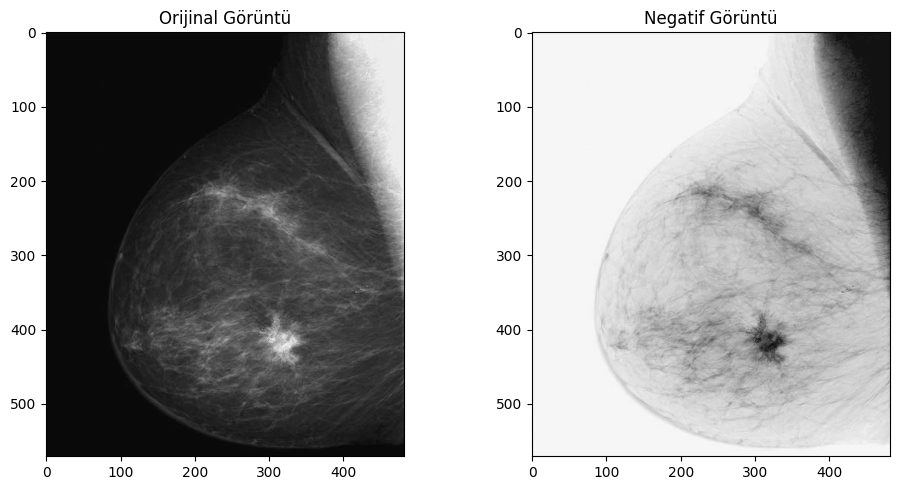

In [12]:
pgm_image = PGMImage('Fig0304(a)(breast_digital_Xray).pgm')
pgm_image.mypgmwrite('negative_breast_digital_Xray.pgm')

original_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))

pgm_image.myImageNegative()

log_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Orijinal Görüntü")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Negatif Görüntü")
plt.imshow(log_image, cmap='gray')

plt.tight_layout()

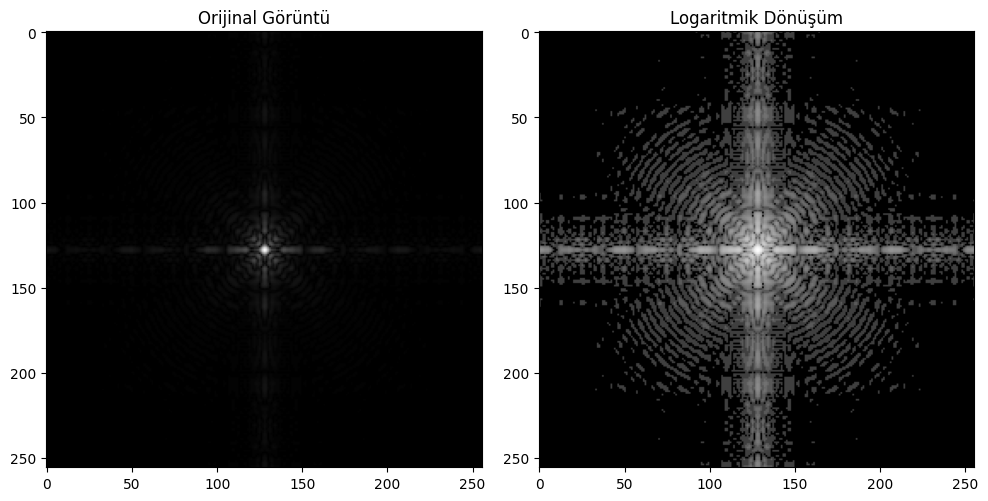

0


In [13]:
pgm_image = PGMImage('Fig0305(a)(DFT_no_log).pgm')

original_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))
pgm_image.myImageLogTransform()
log_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))


plt.figure(figsize=(10, 5))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.title("Orijinal Görüntü")
plt.imshow(original_image, cmap='gray', vmin = 0 , vmax = pgm_image.maxval)

# Logaritmik dönüşüm uygulanmış görüntü
plt.subplot(1, 2, 2)
plt.title("Logaritmik Dönüşüm")
plt.imshow(log_image, cmap='gray', vmin = 0 , vmax = pgm_image.maxval)

plt.tight_layout()
plt.show()
print(np.min(log_image))

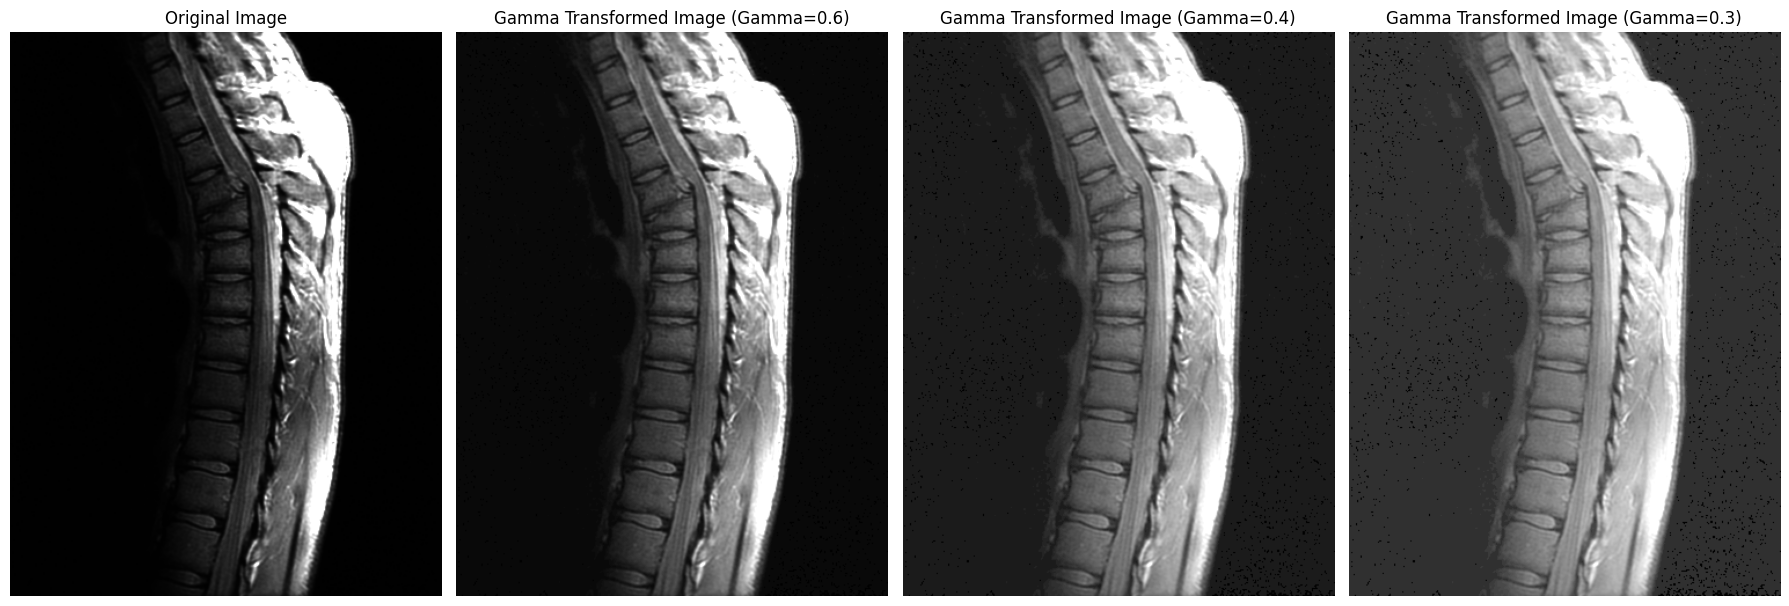

In [15]:
pgm_image = PGMImage('Fig0308(a)(fractured_spine).pgm')
original_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))

gamma_values = [0.6, 0.4, 0.3]
gamma_transformed_images = []

for gamma_value in gamma_values:
    pgm_image.pixels = original_image.flatten().tolist()
    pgm_image.myImageGammaTransform(gamma_value)
    transformed_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))
    gamma_transformed_images.append(transformed_image)

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

for i, gamma_transformed_image in enumerate(gamma_transformed_images):
    plt.subplot(1, 4, i + 2)
    plt.title(f'Gamma Transformed Image (Gamma={gamma_values[i]})')
    plt.imshow(gamma_transformed_image, cmap='gray', vmin=0, vmax=pgm_image.maxval)
    plt.axis('off')

plt.tight_layout()
plt.show()

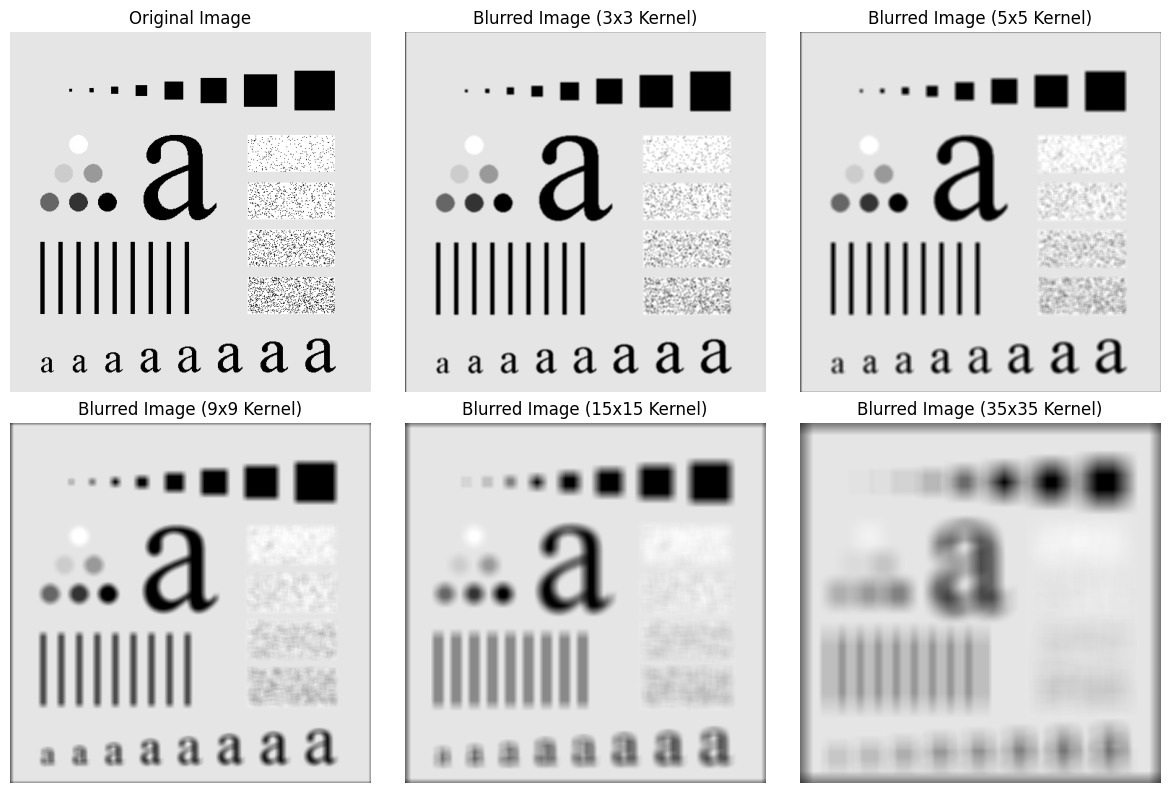

In [9]:
kernel_1 = np.ones((3, 3), dtype=float) / 9  
kernel_2 = np.ones((5, 5), dtype=float) / 25  
kernel_3 = np.ones((9, 9), dtype=float) / 81  
kernel_4 = np.ones((15, 15), dtype=float) / 225  
kernel_5 = np.ones((35, 35), dtype=float) / 1225    

pgm_image = PGMImage('Fig0333(a)(test_pattern_blurring_orig).pgm')

original_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))

blurred_m3 = pgm_image.myImageCorrelation(kernel_1)
pgm_image.pixels = original_image.flatten().tolist()

blurred_m5 = pgm_image.myImageCorrelation(kernel_2)
pgm_image.pixels = original_image.flatten().tolist()

blurred_m9 = pgm_image.myImageCorrelation(kernel_3)
pgm_image.pixels = original_image.flatten().tolist()

blurred_m15 = pgm_image.myImageCorrelation(kernel_4)
pgm_image.pixels = original_image.flatten().tolist()

blurred_m35 = pgm_image.myImageCorrelation(kernel_5)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Blurred Image (3x3 Kernel)')
plt.imshow(blurred_m3, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Blurred Image (5x5 Kernel)')
plt.imshow(blurred_m5, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Blurred Image (9x9 Kernel)')
plt.imshow(blurred_m9, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Blurred Image (15x15 Kernel)')
plt.imshow(blurred_m15, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Blurred Image (35x35 Kernel)')
plt.imshow(blurred_m35, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.tight_layout()
plt.show()

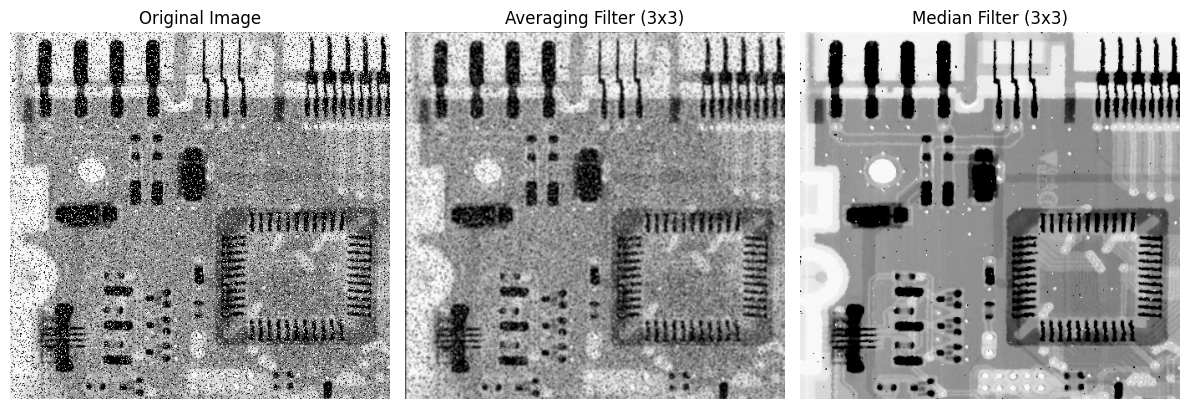

In [16]:
pgm_image = PGMImage('Fig0335(a)(ckt_board_saltpep_prob_pt05).pgm')

original_image = np.array(pgm_image.pixels, dtype=np.uint8).reshape((pgm_image.height, pgm_image.width))

kernel_1 = np.ones((3, 3), dtype=float) / 9  

avg_mask_3_3 = pgm_image.myImageCorrelation(kernel_1)
pgm_image.pixels = original_image.flatten().tolist()

median_mask_3_3 = pgm_image.myImageMedianFilter(3,3)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Averaging Filter (3x3)')
plt.imshow(avg_mask_3_3, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Median Filter (3x3)')
plt.imshow(median_mask_3_3, cmap='gray', vmin=0, vmax= pgm_image.maxval)
plt.axis('off')

plt.tight_layout()
plt.show()